# TTMM ISL Plot

Credit goes to Tobias Grosser for ```islplot3d``` of which I barely copied the functions and mapped them into ```matplotlib```-friendly versions.

In [1]:
# %matplotlib inline
%matplotlib notebook
%pylab

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d.art3d as art3d
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

import pylab as pl
import numpy

from islplot.support import *
from islpy import *

# %matplotlib notebook

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


In [36]:
def mpy_list_scalar(l, x):
    return [x * i for i in l]
    
def float_list_to_rgb_string(fl):
    scaled = mpy_list_scalar(fl, 255.0)
    hex_str = ['{:02x}'.format(int(i)) for i in scaled]
    w = "".join(hex_str)
    
    return "#" + w

def plot_points(ax, points, color, size):
    xs = list([point[0] for point in points])
    ys = list([point[1] for point in points])
    zs = list([point[2] for point in points])
    ax.scatter(xs, ys, zs, c=color, s=size)
    
def plot_bset_3d_points(ax, bset_data, only_hull, color):
    """
    Plot the individual points of a three dimensional isl basic set.
    :param bset_data: The islpy.BasicSet to plot.
    :param only_hull: Only plot the points on the hull of the basic set.
    """
    bset_data = bset_data.convex_hull()
    #color = colors[0]['light']
    points = bset_get_points(bset_data, only_hull)
    plot_points(ax, points, color, 1.0)

def plot_set_3d_vertices(ax, vertices, color):
    # color = colors[0]['dark']
    plot_points(ax, vertices, color, 8.0)

def plot_set_3d_shape(ax, vertices, faces, show_border, color, alpha):
    #color = colors[0]['base']
    
    for f in faces:
        vertices_in_order = []
        for p in f:
            vertices_in_order.append(vertices[p])
        tri = art3d.Poly3DCollection([vertices_in_order])
        tri.set_facecolor(color)
        #tri.set_alpha(alpha)
        if show_border:
            tri.set_edgecolor('k')
        ax.add_collection3d(tri)

def plot_set_3d(sets_data, fig=None, alpha=0.3, show_vertices=True, show_points=True,
        show_shape=True, show_border=True, only_hull_points=True, face_colors=None, face_alpha=None):
    """
    This function plots a three dimensional convex set.
    :param set_data: The set to illustrate.
    :param show_vertices: Show the vertices at the corner of the set.
    :param show_points: Show the full integer points contained in the set.
    :param show_shape: Show the faces that form the bounds of the set.
    :param show_border: Show the border of a tile.
    :param only_hull_points: Only show the points on the hull of the basic
                             set.
    """
    
    if fig == None:
        fig_n = plt.figure()
    else:
        fig_n = fig
    ax = fig_n.gca(projection='3d')
    # index = 0
    for index in range(len(sets_data)):
        set_data = sets_data[index]
        if face_colors == None:
            face_color_val = [numpy.random.random_sample() for i in range(3)] # rand(3) # was 3
        else:
            face_color_val = face_colors[index]
        if face_alpha == None:
            face_color_alpha = alpha
        else:
            face_color_alpha = face_alpha[index]
        vertex_color_val = mpy_list_scalar(face_color_val, 0.2)
        point_color_val = mpy_list_scalar(face_color_val, 0.5)
        
        face_color_val.append(face_color_alpha)
        face_color = float_list_to_rgb_string(face_color_val)
        vertex_color = float_list_to_rgb_string(vertex_color_val)
        point_color = float_list_to_rgb_string(point_color_val)
        
        vertices, faces = get_vertices_and_faces(set_data)
        if show_vertices:
            plot_set_3d_vertices(ax, vertices, vertex_color)
        if show_shape:
            plot_set_3d_shape(ax, vertices, faces, show_border, face_color, face_color_alpha)
        if show_points:
            plot_bset_3d_points(ax, set_data, only_hull_points, point_color)
        
        #index += 1
        
    return fig_n

def plot_axis():
    return None

#def plot_set_3d(set_data, show_vertices=False, show_points=False,
#        show_shape=True, full_page=False, scale=0.7, show_axes=True,
#        only_hull_points=True):



<IPython.core.display.Javascript object>


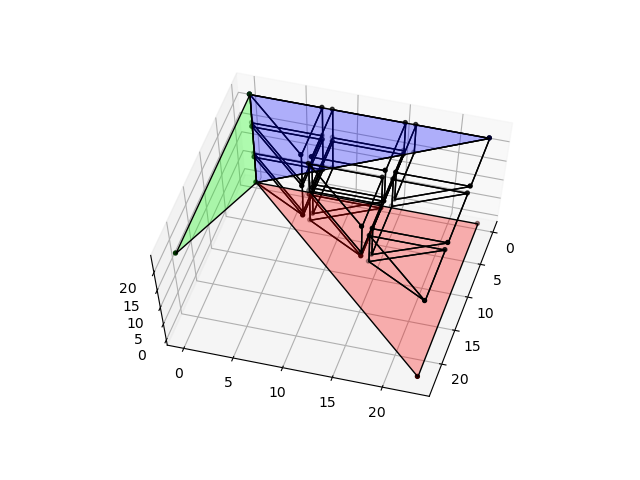

In [46]:
Tiles = Map("{ [ii, jj, kk] -> [i, j, k] : ii <= i <= ii + 7 and jj <= j <= jj + 7 and kk <= k <= kk + 7 and 0 <= ii < 24 and 0 <= jj < 24 and 0 <= kk < 24 and ii mod 8 = 0 and jj mod 8 = 0 and kk mod 8 = 0 and i + ii <= j + jj and i + ii <= k + kk and j + jj <= k + kk}")
Sets = []
Colors = []
Alpha = []
for ii in [0, 8, 16]:
    for jj in [0, 8, 16]:
        for kk in [0, 8, 16]:
            TileOrigin = Set("{[" + str(ii) + ", " + str(jj) + ", " + str(kk) + "]}")
            Tile = Tiles.intersect_domain(TileOrigin).range()
            Sets.append(Tile)
            Colors.append([0,0,0])
            Alpha.append(0)

A = Set("{ [i, j, 0] : 0 <= i < 24 and 0 <= j < 24 and i <= j }")
B = Set("{ [i, 0, k] : 0 <= i < 24 and 0 <= k < 24 and i <= k }")
C = Set("{ [0, j, k] : 0 <= j < 24 and 0 <= k < 24 and j <= k }")

Sets.append(A)
Alpha.append(0.3)
Colors.append([1, 0, 0])

Sets.append(B)
Alpha.append(0.3)
Colors.append([0, 1, 0])

Sets.append(C)
Alpha.append(0.3)
Colors.append([0, 0, 1])


# ProduitMatriceTriangle = Set("{ [i', j', k'] : i' = i + 8*ii and j' = j + 8*jj and k' = k + 8*kk and 0 <= k <= 7 and 0 <= j <= 7 and 0 <= i <= 7 and 0 <= ii <= 7 and 0 <= jj <= 7 and 0 <= kk <= 7 }")
fig2 = plot_set_3d(Sets, show_points=False, show_vertices=True, show_shape=True, face_colors=Colors, face_alpha=Alpha)